In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# path
human_goslim_up_path = '../data/human_annotation/human_annotation_up.tsv'
rice_goslim_up_path = '../data/rice_annotation/rice_annotation_up.tsv'

human_goslim_all_path = '../data/biomart_goslim/biomart_human_goslim_R110.tsv'
rice_goslim_all_path = '../data/biomart_goslim/biomart_rice_goslim_R56.tsv'

In [3]:
human_goslim_up = pd.read_csv(human_goslim_up_path, sep='\t')
rice_goslim_up = pd.read_csv(rice_goslim_up_path, sep='\t')
human_goslim_all = pd.read_csv(human_goslim_all_path, sep='\t')
rice_goslim_all = pd.read_csv(rice_goslim_all_path, sep='\t')

display(human_goslim_up)
display(rice_goslim_up)
display(human_goslim_all)
display(rice_goslim_all)

/tmp/ipykernel_17708/2801169671.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  human_goslim_all = pd.read_csv(human_goslim_all_path, sep='\t')
/tmp/ipykernel_17708/2801169671.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  rice_goslim_all = pd.read_csv(rice_goslim_all_path, sep='\t')


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s),GOSlim GOA Description,HN-score(HN5),name
0,ENSG00000173110,1,161524540,161526894,GO:0006457,protein folding,245,HSPA6
1,ENSG00000173110,1,161524540,161526894,GO:0005856,cytoskeleton,245,HSPA6
2,ENSG00000173110,1,161524540,161526894,GO:0005829,cytosol,245,HSPA6
3,ENSG00000173110,1,161524540,161526894,GO:0005634,nucleus,245,HSPA6
4,ENSG00000173110,1,161524540,161526894,GO:0043226,organelle,245,HSPA6
...,...,...,...,...,...,...,...,...
4843,ENSG00000184205,X,53082367,53088540,GO:0005634,nucleus,51,TSPYL2
4844,ENSG00000184205,X,53082367,53088540,GO:0065003,protein-containing complex assembly,51,TSPYL2
4845,ENSG00000184205,X,53082367,53088540,GO:0006325,chromatin organization,51,TSPYL2
4846,ENSG00000184205,X,53082367,53088540,GO:0005730,nucleolus,51,TSPYL2


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s),GOSlim GOA Description,HN-score(HN5)
0,Os04g0107900,4,483234,485978,GO:0005488,binding,253
1,Os04g0107900,4,483234,485978,GO:0009987,cellular process,253
2,Os04g0107900,4,483234,485978,GO:0016787,hydrolase activity,253
3,Os04g0107900,4,483234,485978,GO:0003824,catalytic activity,253
4,Os04g0107900,4,483234,485978,GO:0000166,nucleotide binding,253
...,...,...,...,...,...,...,...
2930,Os03g0289800,3,10039387,10044161,GO:0016787,hydrolase activity,42
2931,Os03g0289800,3,10039387,10044161,GO:0003824,catalytic activity,42
2932,Os03g0289800,3,10039387,10044161,GO:0005488,binding,42
2933,Os03g0289800,3,10039387,10044161,GO:0003674,molecular_function,42


,Gene stable ID,Chromosome/scaffold name,start2 (bp),end2 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,ENSG00000243485,1,29554,31109,GO:0031047,gene silencing by RNA
1,ENSG00000284332,1,30366,30503,GO:0031047,gene silencing by RNA
2,ENSG00000186092,1,65419,71585,GO:0023052,signaling
3,ENSG00000186092,1,65419,71585,GO:0060089,molecular transducer activity
4,ENSG00000186092,1,65419,71585,GO:0005886,plasma membrane
...,...,...,...,...,...,...
581396,ENSG00000292372,Y,57207346,57212230,GO:0007010,cytoskeleton organization
581397,ENSG00000292372,Y,57207346,57212230,GO:0008092,cytoskeletal protein binding
581398,ENSG00000292372,Y,57207346,57212230,GO:0031410,cytoplasmic vesicle
581399,ENSG00000292372,Y,57207346,57212230,GO:0043226,organelle


,Gene stable ID,Chromosome/scaffold name,start1 (bp),end1 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,Os01g0100100,1,2983,10815,GO:0006810,transport
1,Os01g0100100,1,2983,10815,GO:0008150,biological_process
2,Os01g0100100,1,2983,10815,GO:0009987,cellular process
3,Os01g0100100,1,2983,10815,GO:0003674,molecular_function
4,Os01g0100100,1,2983,10815,GO:0030234,enzyme regulator activity
...,...,...,...,...,...,...
258565,gene-rps19,Pt,134200,134481,GO:0003674,molecular_function
258566,gene-rps19,Pt,134200,134481,GO:0005198,structural molecule activity
258567,gene-rps19,Pt,134200,134481,GO:0005488,binding
258568,gene-rps19,Pt,134200,134481,GO:0003723,RNA binding


## Fold enrichment

In [4]:
def count_goslim(df):
    goslim_counts = df.groupby(['GOSlim GOA Accession(s)', 'GOSlim GOA Description']).size().reset_index(name='counts')
    return goslim_counts

In [5]:
human_goslim_up_counts = count_goslim(human_goslim_up)
rice_goslim_up_counts = count_goslim(rice_goslim_up)
human_goslim_all_counts = count_goslim(human_goslim_all)
rice_goslim_all_counts = count_goslim(rice_goslim_all)

results_directory = './counts'
os.makedirs(results_directory, exist_ok=True)

# sort
human_goslim_up_counts = human_goslim_up_counts.sort_values(by='counts', ascending=False).copy()
rice_goslim_up_counts = rice_goslim_up_counts.sort_values(by='counts', ascending=False).copy()
human_goslim_all_counts = human_goslim_all_counts.sort_values(by='counts', ascending=False).copy()
rice_goslim_all_counts = rice_goslim_all_counts.sort_values(by='counts', ascending=False).copy()

human_goslim_up_counts.to_csv(f'{results_directory}/human_goslim_up_counts.tsv', sep='\t', index=False)
rice_goslim_up_counts.to_csv(f'{results_directory}/rice_goslim_up_counts.tsv', sep='\t', index=False)
human_goslim_all_counts.to_csv(f'{results_directory}/human_goslim_all_counts.tsv', sep='\t', index=False)
rice_goslim_all_counts.to_csv(f'{results_directory}/rice_goslim_all_counts.tsv', sep='\t', index=False)

display(human_goslim_up_counts)
display(rice_goslim_up_counts)
display(human_goslim_all_counts)
display(rice_goslim_all_counts)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts
87,GO:0043226,organelle,373
15,GO:0005634,nucleus,221
72,GO:0023052,signaling,219
13,GO:0005576,extracellular region,175
92,GO:0048856,anatomical structure development,160
...,...,...,...
29,GO:0005840,ribosome,1
109,GO:0140053,mitochondrial gene expression,1
90,GO:0045182,translation regulator activity,1
86,GO:0042393,histone binding,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
2,GO:0003674,molecular_function,243
41,GO:0008150,biological_process,232
12,GO:0005575,cellular_component,231
59,GO:0009987,cellular process,183
10,GO:0005488,binding,181
...,...,...,...
25,GO:0005840,ribosome,1
76,GO:0045182,translation regulator activity,1
57,GO:0009856,pollination,1
26,GO:0005856,cytoskeleton,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
99,GO:0043226,organelle,56768
19,GO:0005634,nucleus,32321
13,GO:0003824,catalytic activity,27759
83,GO:0023052,signaling,21244
36,GO:0005886,plasma membrane,19067
...,...,...,...
117,GO:0071941,nitrogen cycle metabolic process,36
90,GO:0031386,protein tag,36
66,GO:0007568,aging,3
116,GO:0071554,cell wall organization or biogenesis,3


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
2,GO:0003674,molecular_function,22786
16,GO:0005575,cellular_component,20356
51,GO:0008150,biological_process,20063
72,GO:0009987,cellular process,16446
14,GO:0005488,binding,15214
...,...,...,...
11,GO:0005102,signaling receptor binding,47
47,GO:0007267,cell-cell signaling,13
69,GO:0009838,abscission,10
83,GO:0019825,oxygen binding,6


In [6]:
def fold_enrichment(df_up_counts, df_all_counts):
    # Get the total number of terms in dataframes
    total_terms_up = df_up_counts['counts'].sum()
    total_terms_all = df_all_counts['counts'].sum()

    merged_df = pd.merge(df_up_counts,
                         df_all_counts, 
                         on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], 
                         how='right', # if there is no match, fill with NaN or 0
                         suffixes=('_up', '_all'))
    
    merged_df['counts_up'] = merged_df['counts_up'].fillna(0)
    merged_df['up_ratio'] = (merged_df['counts_up'] / total_terms_up)
    merged_df['all_ratio'] = (merged_df['counts_all'] / total_terms_all)
    merged_df['fold_enrichment'] = (merged_df['counts_up'] / total_terms_up) / (merged_df['counts_all'] / total_terms_all)
    return merged_df

In [7]:
human_goslim_enrichment = fold_enrichment(human_goslim_up_counts, human_goslim_all_counts)
rice_goslim_enrichment = fold_enrichment(rice_goslim_up_counts, rice_goslim_all_counts)

human_goslim_enrichment.to_csv(f'{results_directory}/human_goslim_enrichment.tsv', sep='\t', index=False)
rice_goslim_enrichment.to_csv(f'{results_directory}/rice_goslim_enrichment.tsv', sep='\t', index=False)

display(human_goslim_enrichment)
display(rice_goslim_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0043226,organelle,373.0,56768,0.076939,0.097640,0.787986
1,GO:0005634,nucleus,221.0,32321,0.045586,0.055592,0.820013
2,GO:0003824,catalytic activity,148.0,27759,0.030528,0.047745,0.639398
3,GO:0023052,signaling,219.0,21244,0.045173,0.036539,1.236292
4,GO:0005886,plasma membrane,154.0,19067,0.031766,0.032795,0.968616
...,...,...,...,...,...,...,...
132,GO:0071941,nitrogen cycle metabolic process,0.0,36,0.000000,0.000062,0.000000
133,GO:0031386,protein tag,5.0,36,0.001031,0.000062,16.656382
134,GO:0007568,aging,0.0,3,0.000000,0.000005,0.000000
135,GO:0071554,cell wall organization or biogenesis,0.0,3,0.000000,0.000005,0.000000


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0003674,molecular_function,243.0,22786,0.082794,0.088123,0.939525
1,GO:0005575,cellular_component,231.0,20356,0.078705,0.078725,0.999746
2,GO:0008150,biological_process,232.0,20063,0.079046,0.077592,1.018737
3,GO:0009987,cellular process,183.0,16446,0.062351,0.063604,0.980304
4,GO:0005488,binding,181.0,15214,0.061670,0.058839,1.048106
...,...,...,...,...,...,...,...
92,GO:0005102,signaling receptor binding,0.0,47,0.000000,0.000182,0.000000
93,GO:0007267,cell-cell signaling,0.0,13,0.000000,0.000050,0.000000
94,GO:0009838,abscission,0.0,10,0.000000,0.000039,0.000000
95,GO:0019825,oxygen binding,0.0,6,0.000000,0.000023,0.000000


## False discovery rate

1. calculate p-value
2. calculate FDR
3. calculate q-value

In [8]:
def calculate_p_q_values(df_enrichment):
    p_values = []
    df_enrichment['counts_up'] = df_enrichment['counts_up'].astype(int) # float(0.0) to int(0)
    total_all_genes = df_enrichment['counts_all'].sum()
    total_up_genes = df_enrichment['counts_up'].sum()

    for index, row in df_enrichment.iterrows():
        if row['counts_up'] == 0:
            p_values.append(1.0)
        else:
            observed_up = row['counts_up']
            observed_all = row['counts_all']
            observed_not_up = observed_all - observed_up
            total_not_up_genes = total_all_genes - total_up_genes

            _, p_value = fisher_exact([[observed_up, total_up_genes - observed_up], 
                                        [observed_not_up, total_not_up_genes - observed_not_up]], 
                                        alternative='greater')
            p_values.append(p_value)
    
    _, q_values, _, _ = multipletests(p_values, 
                                      alpha=0.05, 
                                      method='fdr_bh')
    
    df_enrichment['p_value'] = p_values
    df_enrichment['q_value'] = q_values

    return df_enrichment

In [9]:
human_goslim_enrichment_with_p_q = calculate_p_q_values(human_goslim_enrichment)
rice_goslim_enrichment_with_p_q = calculate_p_q_values(rice_goslim_enrichment)

human_goslim_enrichment_with_p_q.to_csv(f'{results_directory}/human_goslim_enrichment_with_p_q.tsv', sep='\t', index=False)
rice_goslim_enrichment_with_p_q.to_csv(f'{results_directory}/rice_goslim_enrichment_with_p_q.tsv', sep='\t', index=False)

display(human_goslim_enrichment_with_p_q)
display(rice_goslim_enrichment_with_p_q)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0043226,organelle,373,56768,0.076939,0.097640,0.787986,1.000000,1.000000
1,GO:0005634,nucleus,221,32321,0.045586,0.055592,0.820013,0.999238,1.000000
2,GO:0003824,catalytic activity,148,27759,0.030528,0.047745,0.639398,1.000000,1.000000
3,GO:0023052,signaling,219,21244,0.045173,0.036539,1.236292,0.001026,0.009373
4,GO:0005886,plasma membrane,154,19067,0.031766,0.032795,0.968616,0.668058,1.000000
...,...,...,...,...,...,...,...,...,...
132,GO:0071941,nitrogen cycle metabolic process,0,36,0.000000,0.000062,0.000000,1.000000,1.000000
133,GO:0031386,protein tag,5,36,0.001031,0.000062,16.656382,0.000012,0.000168
134,GO:0007568,aging,0,3,0.000000,0.000005,0.000000,1.000000,1.000000
135,GO:0071554,cell wall organization or biogenesis,0,3,0.000000,0.000005,0.000000,1.000000,1.000000


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0003674,molecular_function,243,22786,0.082794,0.088123,0.939525,0.855030,1.000000
1,GO:0005575,cellular_component,231,20356,0.078705,0.078725,0.999746,0.511592,1.000000
2,GO:0008150,biological_process,232,20063,0.079046,0.077592,1.018737,0.393474,1.000000
3,GO:0009987,cellular process,183,16446,0.062351,0.063604,0.980304,0.620941,1.000000
4,GO:0005488,binding,181,15214,0.061670,0.058839,1.048106,0.266659,0.994845
...,...,...,...,...,...,...,...,...,...
92,GO:0005102,signaling receptor binding,0,47,0.000000,0.000182,0.000000,1.000000,1.000000
93,GO:0007267,cell-cell signaling,0,13,0.000000,0.000050,0.000000,1.000000,1.000000
94,GO:0009838,abscission,0,10,0.000000,0.000039,0.000000,1.000000,1.000000
95,GO:0019825,oxygen binding,0,6,0.000000,0.000023,0.000000,1.000000,1.000000


In [12]:
human_goslim_enrichment_with_p_q_up = human_goslim_enrichment_with_p_q[human_goslim_enrichment_with_p_q['counts_up'] > 0]
rice_goslim_enrichment_with_p_q_up = rice_goslim_enrichment_with_p_q[rice_goslim_enrichment_with_p_q['counts_up'] > 0]

common_enrichment = pd.merge(human_goslim_enrichment_with_p_q_up, rice_goslim_enrichment_with_p_q_up, 
                             on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], 
                             how='inner', 
                             suffixes=('_human', '_rice'))

display(human_goslim_enrichment_with_p_q_up)
display(rice_goslim_enrichment_with_p_q_up)
display(common_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0043226,organelle,373,56768,0.076939,0.097640,0.787986,1.000000,1.000000
1,GO:0005634,nucleus,221,32321,0.045586,0.055592,0.820013,0.999238,1.000000
2,GO:0003824,catalytic activity,148,27759,0.030528,0.047745,0.639398,1.000000,1.000000
3,GO:0023052,signaling,219,21244,0.045173,0.036539,1.236292,0.001026,0.009373
4,GO:0005886,plasma membrane,154,19067,0.031766,0.032795,0.968616,0.668058,1.000000
...,...,...,...,...,...,...,...,...,...
124,GO:0022600,digestive system process,2,215,0.000413,0.000370,1.115590,0.536044,1.000000
126,GO:0050886,endocrine process,2,187,0.000413,0.000322,1.282630,0.462618,1.000000
127,GO:0016073,snRNA metabolic process,2,165,0.000413,0.000284,1.453648,0.400366,1.000000
129,GO:0009975,cyclase activity,3,89,0.000619,0.000153,4.042448,0.038762,0.183116


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0003674,molecular_function,243,22786,0.082794,0.088123,0.939525,0.855030,1.000000
1,GO:0005575,cellular_component,231,20356,0.078705,0.078725,0.999746,0.511592,1.000000
2,GO:0008150,biological_process,232,20063,0.079046,0.077592,1.018737,0.393474,1.000000
3,GO:0009987,cellular process,183,16446,0.062351,0.063604,0.980304,0.620941,1.000000
4,GO:0005488,binding,181,15214,0.061670,0.058839,1.048106,0.266659,0.994845
...,...,...,...,...,...,...,...,...,...
81,GO:0005777,peroxisome,2,144,0.000681,0.000557,1.223595,0.487360,1.000000
83,GO:0009790,embryo development,3,110,0.001022,0.000425,2.402695,0.130217,0.631554
84,GO:0016049,cell growth,1,95,0.000341,0.000367,0.927356,0.661997,1.000000
86,GO:0008219,cell death,5,72,0.001704,0.000278,6.117973,0.001400,0.022629


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up_human,counts_all_human,up_ratio_human,all_ratio_human,fold_enrichment_human,p_value_human,q_value_human,counts_up_rice,counts_all_rice,up_ratio_rice,all_ratio_rice,fold_enrichment_rice,p_value_rice,q_value_rice
0,GO:0005634,nucleus,221,32321,0.045586,0.055592,0.820013,9.992377e-01,1.000000e+00,60,5273,0.020443,0.020393,1.002452,5.103143e-01,1.000000e+00
1,GO:0003824,catalytic activity,148,27759,0.030528,0.047745,0.639398,1.000000e+00,1.000000e+00,107,12023,0.036457,0.046498,0.784045,9.968277e-01,1.000000e+00
2,GO:0005886,plasma membrane,154,19067,0.031766,0.032795,0.968616,6.680577e-01,1.000000e+00,13,2276,0.004429,0.008802,0.503201,9.981747e-01,1.000000e+00
3,GO:0005829,cytosol,123,18510,0.025371,0.031837,0.796915,9.965083e-01,1.000000e+00,30,1465,0.010221,0.005666,1.804071,1.816219e-03,2.516760e-02
4,GO:0005654,nucleoplasm,136,16444,0.028053,0.028283,0.991847,5.507402e-01,1.000000e+00,3,374,0.001022,0.001446,0.706675,7.975360e-01,1.000000e+00
5,GO:0048856,anatomical structure development,160,14715,0.033003,0.025310,1.303986,5.826264e-04,6.651652e-03,15,1282,0.005111,0.004958,1.030797,4.883171e-01,1.000000e+00
6,GO:0036211,protein modification process,88,12775,0.018152,0.021973,0.826104,9.722008e-01,1.000000e+00,12,3538,0.004089,0.013683,0.298809,1.000000e+00,1.000000e+00
7,GO:0005576,extracellular region,175,12225,0.036097,0.021027,1.716731,1.457294e-11,3.327487e-10,10,848,0.003407,0.003280,1.038901,4.950302e-01,1.000000e+00
8,GO:0016787,hydrolase activity,60,11509,0.012376,0.019795,0.625211,9.999730e-01,1.000000e+00,50,3869,0.017036,0.014963,1.138522,1.946921e-01,8.210927e-01
9,GO:0016740,transferase activity,62,10983,0.012789,0.018891,0.676993,9.996205e-01,1.000000e+00,19,5028,0.006474,0.019445,0.332911,1.000000e+00,1.000000e+00


In [30]:
common_goslim_path = '../data/common_term_up.tsv'
common_goslim_df = pd.read_csv(common_goslim_path, sep='\t')


human_common = human_goslim_enrichment_with_p_q_up[human_goslim_enrichment_with_p_q_up['GOSlim GOA Accession(s)'].isin(common_goslim_df['Unique GOSlim GOA Accession(s)'])]
human_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
human_common['GOSlim'] = human_common['GOSlim GOA Accession(s)'] + ': ' + human_common['GOSlim GOA Description']
cols = ['GOSlim'] + [col for col in human_common.columns if col != 'GOSlim']
human_common = human_common[cols]
human_common.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)

rice_common = rice_goslim_enrichment_with_p_q_up[rice_goslim_enrichment_with_p_q_up['GOSlim GOA Accession(s)'].isin(common_goslim_df['Unique GOSlim GOA Accession(s)'])]
rice_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
rice_common['GOSlim'] = rice_common['GOSlim GOA Accession(s)'] + ': ' + rice_common['GOSlim GOA Description']
cols = ['GOSlim'] + [col for col in rice_common.columns if col != 'GOSlim']
rice_common = rice_common[cols]
rice_common.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)

display(human_common)
display(rice_common)


/tmp/ipykernel_17708/1564112306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
/tmp/ipykernel_17708/1564112306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_common['GOSlim'] = human_common['GOSlim GOA Accession(s)'] + ': ' + human_common['GOSlim GOA Description']
/tmp/ipykernel_17708/1564112306.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,GOSlim,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
28,GO:0140110: transcription regulator activity,90,5927,0.018564,0.010194,1.821045,1.034321e-07,2.024314e-06
11,GO:0005576: extracellular region,175,12225,0.036097,0.021027,1.716731,1.457294e-11,3.327487e-10
52,GO:0008289: lipid binding,41,2938,0.008457,0.005053,1.673575,1.322817e-03,1.132662e-02
37,GO:0006629: lipid metabolic process,56,4614,0.011551,0.007936,1.455538,4.379783e-03,3.333502e-02
7,GO:0048856: anatomical structure development,160,14715,0.033003,0.025310,1.303986,5.826264e-04,6.651652e-03
16,GO:0003677: DNA binding,100,9223,0.020627,0.015863,1.300292,5.966111e-03,4.086786e-02
31,GO:0005215: transporter activity,52,5587,0.010726,0.009610,1.116189,2.303486e-01,7.339013e-01
30,GO:0005739: mitochondrion,54,5876,0.011139,0.010107,1.102110,2.537439e-01,7.900663e-01
15,GO:0030154: cell differentiation,95,10821,0.019596,0.018612,1.052857,3.195742e-01,9.729258e-01
34,GO:0005730: nucleolus,44,5043,0.009076,0.008674,1.046350,4.016456e-01,1.000000e+00


,GOSlim,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
43,GO:0005783: endoplasmic reticulum,34,986,0.011584,0.003813,3.037890,2.212317e-08,5.364868e-07
59,GO:0005773: vacuole,11,469,0.003748,0.001814,2.066283,1.981971e-02,1.602093e-01
34,GO:0005829: cytosol,30,1465,0.010221,0.005666,1.804071,1.816219e-03,2.516760e-02
51,GO:0006091: generation of precursor metabolite...,12,609,0.004089,0.002355,1.735937,4.829983e-02,3.346488e-01
66,GO:0008289: lipid binding,7,357,0.002385,0.001381,1.727428,1.148557e-01,6.219626e-01
36,GO:0140110: transcription regulator activity,21,1391,0.007155,0.005380,1.330032,1.184750e-01,6.219626e-01
81,GO:0005777: peroxisome,2,144,0.000681,0.000557,1.223595,4.873605e-01,1.000000e+00
18,GO:0016787: hydrolase activity,50,3869,0.017036,0.014963,1.138522,1.946921e-01,8.210927e-01
39,GO:0005739: mitochondrion,15,1184,0.005111,0.004579,1.116117,3.699017e-01,1.000000e+00
48,GO:0005576: extracellular region,10,848,0.003407,0.003280,1.038901,4.950302e-01,1.000000e+00


## Visualization

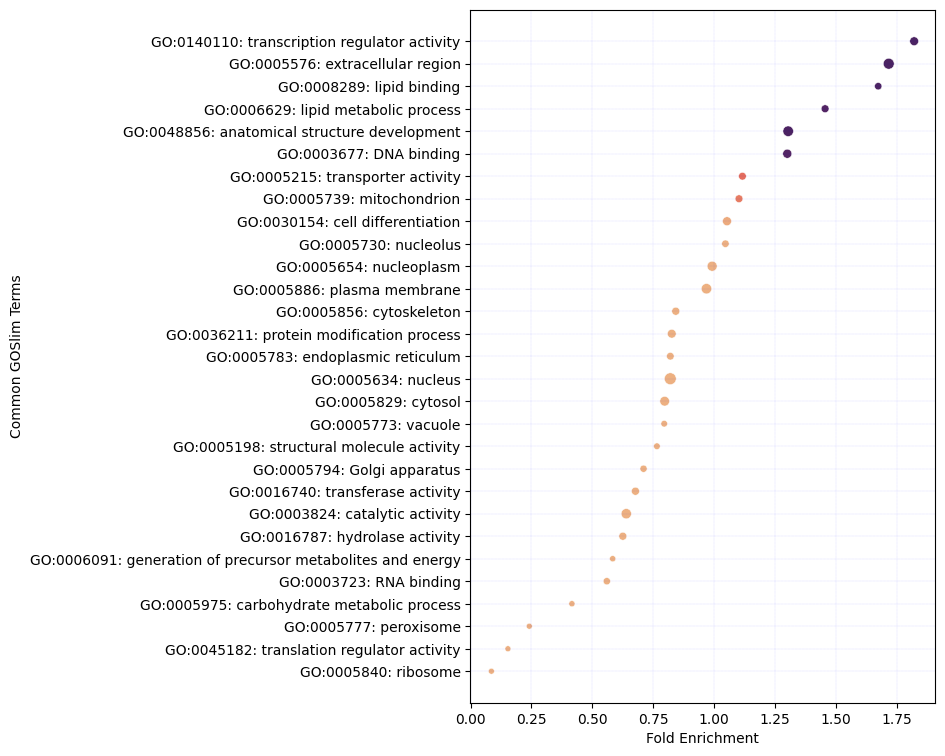

In [54]:
color = sns.color_palette("flare_r", as_cmap=True)

plt.figure(figsize=(6, 9))

dotplot = sns.scatterplot(
    data=human_common,
    x='fold_enrichment',
    y='GOSlim',
    size='counts_up', 
    hue='q_value',     
    palette=color, 
    legend=False
)

plt.grid(color='b', linestyle=':', linewidth=0.1)

plt.xlabel('Fold Enrichment')
plt.ylabel('Common GOSlim Terms')

plt.show()